In [23]:
import bagpy
from bagpy import bagreader
import pandas as pd

In [24]:
def data_csv(b):

    csvfiles = []
    for t in b.topics:
        data = b.message_by_topic(t)
        csvfiles.append(data)

    print(csvfiles[0])
    data = pd.read_csv(csvfiles[0])
    return data

In [25]:
b = bagreader("/home/krishna/LAB3/src/Data/stationary_krishna.bag")
csv_data = data_csv(b)

b.topic_table

[INFO]  Data folder /home/krishna/LAB3/src/Data/stationary_krishna already exists. Not creating.
/home/krishna/LAB3/src/Data/stationary_krishna/imu.csv


,Topics,Types,Message Count,Frequency
0,/imu,imu_driver/Vectornav,10367,23.493816


In [26]:
df= pd.read_csv('../Data/stationary_krishna/imu.csv')

df.tail()

,Time,Header.seq,Header.stamp.secs,Header.stamp.nsecs,Header.frame_id,imu.header.seq,imu.header.stamp.secs,imu.header.stamp.nsecs,imu.header.frame_id,imu.orientation.x,...,imu.linear_acceleration_covariance,mag_field.header.seq,mag_field.header.stamp.secs,mag_field.header.stamp.nsecs,mag_field.header.frame_id,mag_field.magnetic_field.x,mag_field.magnetic_field.y,mag_field.magnetic_field.z,mag_field.magnetic_field_covariance,imu_raw_data
10362,1.677953e+09,20379,1677952805,214032649,imu1_frame,0,0,0,NaN,-0.075600,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,0.0064,-0.3124,0.3290,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","$VNYMR,+088.723,-002.317,-014.406,+00.0064,-00..."
10363,1.677953e+09,20380,1677952805,238992214,imu1_frame,0,0,0,NaN,-0.075600,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,0.0039,-0.3225,0.3237,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","$VNYMR,+088.723,-002.317,-014.406,+00.0039,-00..."
10364,1.677953e+09,20381,1677952805,263917207,imu1_frame,0,0,0,NaN,-0.075619,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,0.0053,-0.3098,0.3303,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","$VNYMR,+088.723,-002.316,-014.408,+00.0053,-00..."
10365,1.677953e+09,20382,1677952805,288913249,imu1_frame,0,0,0,NaN,-0.075619,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,0.0040,-0.3098,0.3275,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","$VNYMR,+088.722,-002.315,-014.407,+00.0040,-00..."
10366,1.677953e+09,20383,1677952805,313838005,imu1_frame,0,0,0,NaN,-0.075632,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,0.0028,-0.3161,0.3316,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","$VNYMR,+088.722,-002.315,-014.409,+00.0028,-00..."


In [27]:
import plotly.express as px
import numpy as np
# Scatterplots of the Northing vs. Easting data
fig = px.scatter_3d(df, x="imu.linear_acceleration.x", y="imu.linear_acceleration.y", z = "imu.linear_acceleration.z")
fig.update_traces(marker_size = 2)
fig.show()

In [28]:
fig = px.scatter_3d(df, x="imu.angular_velocity.x", y="imu.angular_velocity.y", z = "imu.angular_velocity.z")
fig.update_traces(marker_size = 2)
fig.show()

In [29]:
import math 

gyro_x = []
gyro_y = []
gyro_z = []

for i in range(len(df)):
    x = df["imu.orientation.x"][i]
    y = df["imu.orientation.y"][i]
    z = df["imu.orientation.z"][i]
    w = df["imu.orientation.w"][i]

    R = np.array([[1-2*(y**2+z**2), 2*(x*y-z*w), 2*(x*z+y*w)],
                  [2*(x*y+z*w), 1-2*(x**2+z**2), 2*(y*z-x*w)],
                  [2*(x*z-y*w), 2*(y*z+x*w), 1-2*(x**2+y**2)]])
    
    roll = math.atan2(R[2,1], R[2,2])
    pitch = -math.asin(R[2,0])
    yaw = math.atan2(R[1,0], R[0,0])
    gyro_x.append(roll)
    gyro_y.append(pitch)
    gyro_z.append(yaw)

df["gyro_x"] = gyro_x
df["gyro_y"] = gyro_y
df["gyro_z"] = gyro_z

fig = px.scatter_3d(x=gyro_x, y=gyro_y, z = gyro_z)
fig.update_traces(marker_size = 2)
fig.show()

In [30]:
print("mean x = ",df["gyro_x"].mean())
print("mean y = ",df["gyro_y"].mean())
print("mean z = ",df["gyro_z"].mean())

print("median x = ",df["gyro_x"].median())
print("median y = ",df["gyro_y"].median())
print("median z = ",df["gyro_z"].median())

mean x =  -0.2515121845222223
mean y =  -0.04080781142931372
mean z =  1.550309185020099
median x =  -0.2515193985049028
median y =  -0.04080579791162733
median z =  1.5502363482064032


In [31]:
print("mean x = ",df["imu.linear_acceleration.x"].mean())
print("mean y = ",df["imu.linear_acceleration.y"].mean())
print("mean z = ",df["imu.linear_acceleration.z"].mean())

print("median x = ",df["imu.linear_acceleration.x"].median())
print("median y = ",df["imu.linear_acceleration.y"].median())
print("median z = ",df["imu.linear_acceleration.z"].median())

mean x =  -0.38379222533037527
mean y =  2.3564460306742547
mean z =  -9.171422494453553
median x =  -0.384
median y =  2.357
median z =  -9.171


In [32]:
df.std()

/tmp/ipykernel_40539/3390915376.py:1: FutureWarning:

The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Time                            7.482226e+01
Header.seq                      2.992839e+03
Header.stamp.secs               7.482159e+01
Header.stamp.nsecs              2.885903e+08
imu.header.seq                  0.000000e+00
imu.header.stamp.secs           0.000000e+00
imu.header.stamp.nsecs          0.000000e+00
imu.header.frame_id                      NaN
imu.orientation.x               9.760055e-05
imu.orientation.y               1.613176e-04
imu.orientation.z               3.969294e-04
imu.orientation.w               3.993535e-04
imu.angular_velocity.x          2.571952e-03
imu.angular_velocity.y          8.365644e-04
imu.angular_velocity.z          7.002517e-04
imu.linear_acceleration.x       1.468539e-02
imu.linear_acceleration.y       1.317809e-02
imu.linear_acceleration.z       2.218765e-02
mag_field.header.seq            0.000000e+00
mag_field.header.stamp.secs     0.000000e+00
mag_field.header.stamp.nsecs    0.000000e+00
mag_field.header.frame_id                NaN
mag_field.

array([[<Axes: title={'center': 'imu.linear_acceleration.x'}>]],
      dtype=object)

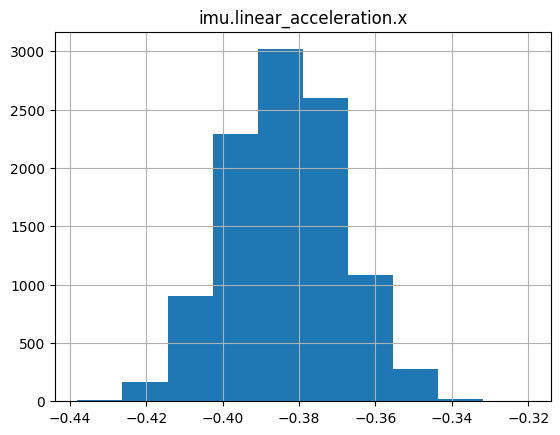

In [33]:
df.hist(column='imu.linear_acceleration.x')